In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('tyc.csv')
df = df.dropna()


In [10]:
#set train and test data, using adj_close as y and the rest as features.
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.15,random_state = 42) 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

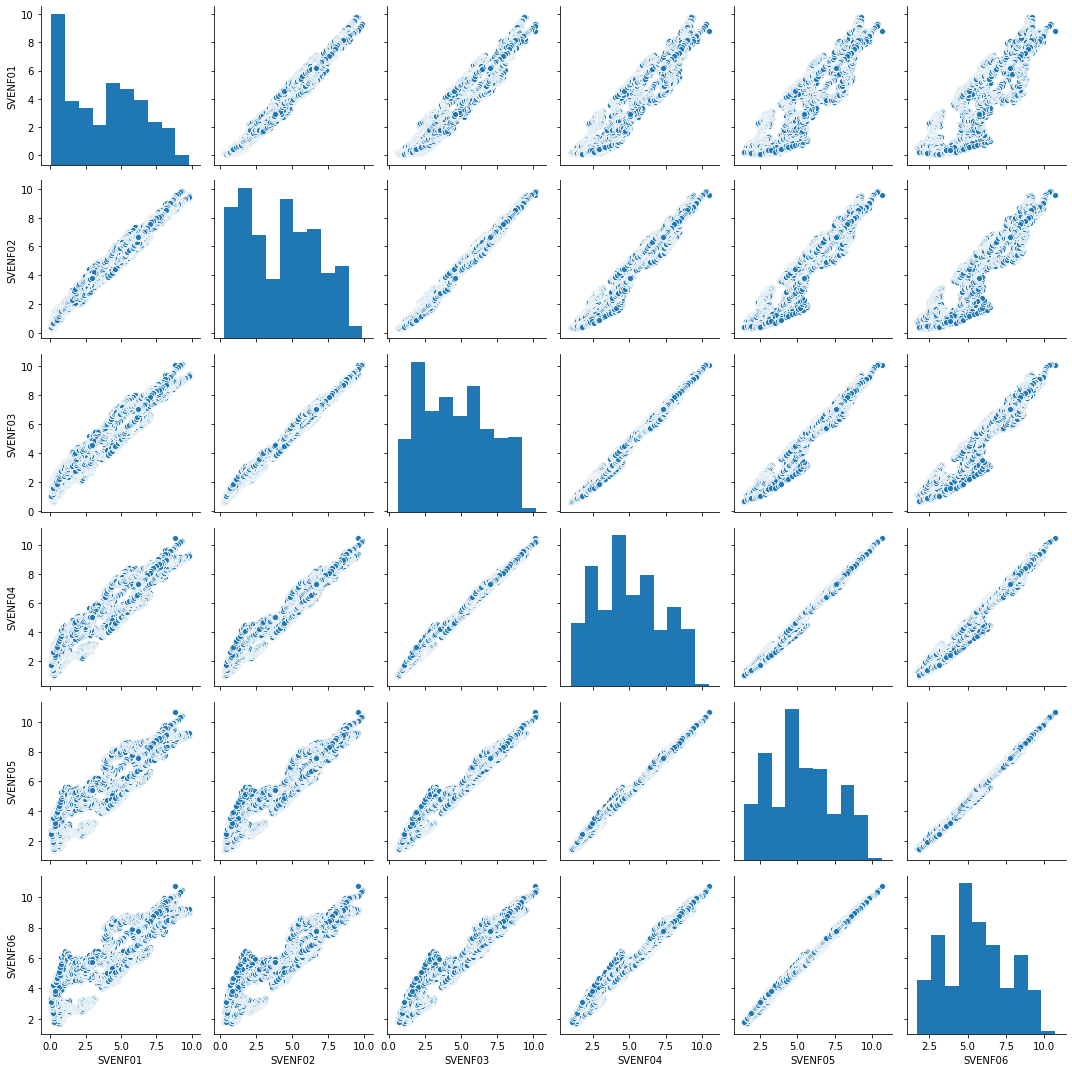

In [11]:
cols = ["SVENF01", 'SVENF02',"SVENF03", 'SVENF04',"SVENF05", 'SVENF06']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()
#some attributes show strong correlation

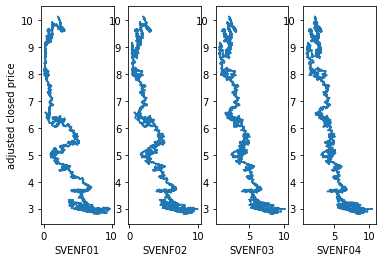

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
ax1.plot(df["SVENF01"], y, label="SVENF01")
ax1.set_ylabel('adjusted closed price')
ax1.set_xlabel("SVENF01")
ax2.plot(df["SVENF02"], y, label="SVENF02")
ax2.set_xlabel("SVENF02")
ax3.plot(df["SVENF03"], y, label="SVENF03")
ax3.set_xlabel("SVENF03")
ax4.plot(df["SVENF04"], y, label="SVENF04")
ax4.set_xlabel("SVENF04")
plt.show()
#plot first 4 features to y

In [77]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.79579848e+01 1.22313057e+00 6.55411544e-01 1.45561136e-01
 1.99031388e-02 2.06243818e-03 2.84492074e-04 3.29679042e-05
 2.55310505e-06 2.02358034e-07 1.41807230e-08 1.14065172e-09
 1.87834664e-10 2.79223513e-10 1.97434352e-10 2.08170746e-10
 2.16455985e-10 2.61581530e-10 2.21833203e-10 2.26975765e-10
 2.24866479e-10 2.31123731e-10 2.57846429e-10 2.56093267e-10
 2.35380183e-10 2.52582252e-10 2.49758360e-10 2.38344403e-10
 2.43769199e-10 2.44978590e-10]


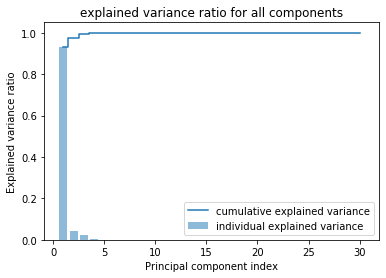

In [78]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
            sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,31), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',
            label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('explained variance ratio for all components')
plt.legend(loc='best')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics, svm
from mlxtend.plotting import plot_decision_regions

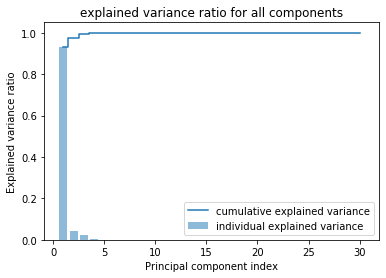

array([0.93179697, 0.97256205, 0.99440592, 0.99925725, 0.99992059,
       0.99998933, 0.99999881, 0.99999991, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [7]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,31), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',
            label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('explained variance ratio for all components')
plt.legend(loc='best')
plt.show()
cum_var_exp

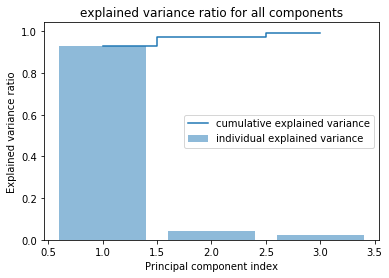

array([0.93067768, 0.97252978, 0.99403721])

In [8]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,4), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(1,4), cum_var_exp, where='mid',
            label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('explained variance ratio for all components')
plt.legend(loc='best')
plt.show()
cum_var_exp

In [27]:
%%time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
#lab_enc = preprocessing.LabelEncoder()
#y_train1 = lab_enc.fit_transform(y_train)
#y_test1 = lab_enc.fit_transform(y_test)
#lng = LogisticRegression()
lng = LinearRegression()
lng.fit(X_train_std, y_train)
y_test_pred = lng.predict(X_test_std)
y_train_pred = lng.predict(X_train_std)
print ('original data')
print('RMSE train: %.3f, test: %.3f' % (
    np.sqrt(mean_squared_error(y_train, y_train_pred)),
    np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#Accurracy of original dataset

original data
RMSE train: 0.777, test: 0.782
R^2 train: 0.902, test: 0.904
CPU times: user 19.2 ms, sys: 3.23 ms, total: 22.4 ms
Wall time: 13.5 ms


In [28]:
%%time
lng.fit(X_train_pca,y_train)
y_test_pred = lng.predict(X_test_pca)
y_train_pred = lng.predict(X_train_pca)
print('PCA with 3 PCs')
print('RMSE train: %.3f, test: %.3f' % (
    np.sqrt(mean_squared_error(y_train, y_train_pred)),
    np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

PCA with 3 PCs
RMSE train: 0.905, test: 0.933
R^2 train: 0.867, test: 0.864
CPU times: user 13.3 ms, sys: 2.93 ms, total: 16.3 ms
Wall time: 9.14 ms


In [29]:
%%time
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train_std,y_train)
y_test_pred = svm.predict(X_test_std)
y_train_pred = svm.predict(X_train_std)
print('original data svm')
print('RMSE train: %.3f, test: %.3f' % (
    np.sqrt(mean_squared_error(y_train, y_train_pred)),
    np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

original data svm
RMSE train: 0.265, test: 0.263
R^2 train: 0.989, test: 0.989
CPU times: user 3 s, sys: 85 ms, total: 3.09 s
Wall time: 3 s


In [30]:
%%time
svm.fit(X_train_pca,y_train)
y_test_pred = svm.predict(X_test_pca)
y_train_pred = svm.predict(X_train_pca)
print('PCA with 3 PCs svm')
print('RMSE train: %.3f, test: %.3f' % (
    np.sqrt(mean_squared_error(y_train, y_train_pred)),
    np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


PCA with 3 PCs svm
RMSE train: 0.248, test: 0.276
R^2 train: 0.990, test: 0.988
CPU times: user 1.34 s, sys: 40.3 ms, total: 1.38 s
Wall time: 1.4 s
